# More on cartopy

In [2]:
# initialization
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Adding geographical features

In addition to `ax.coastline()`, cartopy provides a number of built-in geographical features that can be included in a plot using `ax.add_feature()`. The included features are:

+ `cfeatures.BORDERS`: country boundaries.
+ `cfeatures.STATES`: state and province boundaries.
+ `cfeature.COASTLINE`: coastline, including major islands.
+ `cfeature.LAKES`: natural and artificial lakes.
+ `cfeatures.LAND`: land polygons, including major islands.
+ `cfeature.OCEAN`: ocean polygons.
+ `cfature.RIVERS`: single-line drainages, including lake centerlines.

As an example, here is a cartopy plot with land, ocean, lakes, and rivers included:

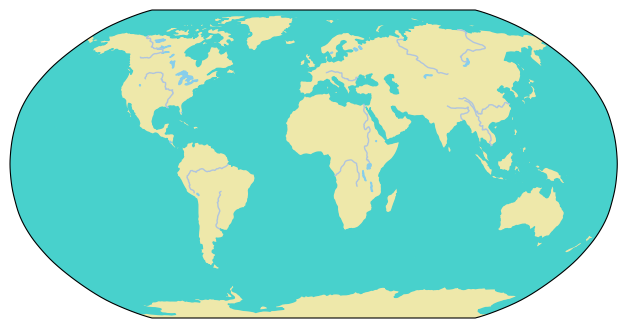

In [3]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(projection=ccrs.Robinson())

ax.add_feature(cfeature.LAND, color="palegoldenrod")
ax.add_feature(cfeature.OCEAN, color="mediumturquoise")
ax.add_feature(cfeature.LAKES, color="skyblue")
ax.add_feature(cfeature.RIVERS, edgecolor="lightsteelblue")

plt.show(fig)

In addition, cartopy also supports adding features available from [Natural Earth](https://www.naturalearthdata.com/) using the `cfeature.NaturalEarthFeature()` function. Here is an example of adding urban areas at the 1:50m scale (note that using the finest 1:10m scale can lead to substantial download and rendering time increases):

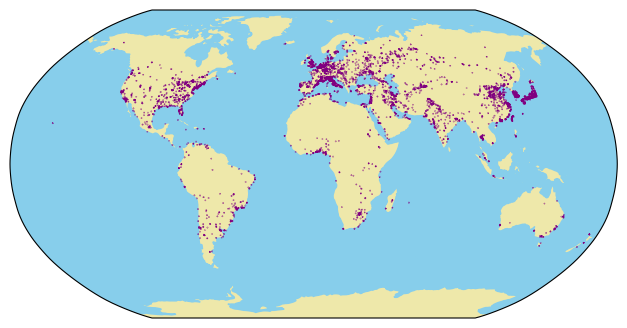

In [4]:
urban = cfeature.NaturalEarthFeature(
    category = "cultural", name = "urban_areas", scale='50m'
)

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(projection=ccrs.Robinson())

ax.add_feature(cfeature.LAND, color="palegoldenrod")
ax.add_feature(cfeature.OCEAN, color="skyblue")
ax.add_feature(urban, color="purple")

plt.show(fig)

## Adding gridlines

The maps we have produced so far are good for making an overall impression but are not especially useful for quantitative purposes, since there is no gridlines to help identify the coordinates of locations. To add gridlines, we can use the `.gridlines()` method of the cartopy-augmented Axes instance. For example:
    
 

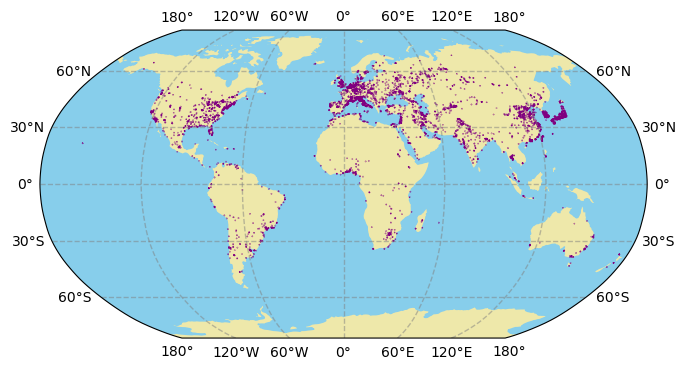

In [5]:
urban = cfeature.NaturalEarthFeature(
    category = "cultural", name = "urban_areas", scale='50m'
)

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(projection=ccrs.Robinson())

ax.add_feature(cfeature.LAND, color="palegoldenrod")
ax.add_feature(cfeature.OCEAN, color="skyblue")
ax.add_feature(urban, color="purple")

ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1, color='gray', alpha=0.5, linestyle='--'
)

plt.show(fig)

To further customize the gridlines, we assign the output of `ax.gridlines()` to a variable and modify its attributes. For example:

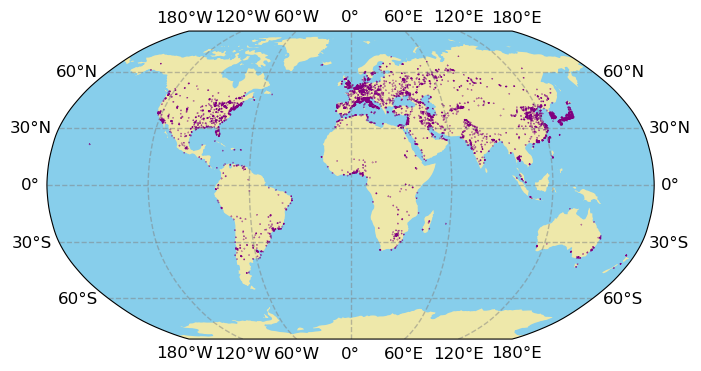

In [6]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

urban = cfeature.NaturalEarthFeature(
    category = "cultural", name = "urban_areas", scale='50m'
)

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(projection=ccrs.Robinson())

ax.add_feature(cfeature.LAND, color="palegoldenrod")
ax.add_feature(cfeature.OCEAN, color="skyblue")
ax.add_feature(urban, color="purple")

gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1, color='gray', alpha=0.5, linestyle='--'
)

gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 60))
gl.ylocator = mticker.FixedLocator(np.arange(-60, 61, 30))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

plt.show(fig)

Notice that `LONGITUDE_FORMATTER` and `LATITUDE_FORMATTER` comes from the `cartopy.mpl.gridliner` submodule, and the `FixedLocator()` function comes from the `matplotlib.ticker` submodule

## Limiting the extent of the map

Sometimes you'll be interested in a smaller geographical region and want the convenience of using available geographical features from cartopy. To limit the range of latitude and longitude in a cartopy plot, use the `.set_extent()` method of the cartopy-augmented Axes instance. For example, suppose we're interested in the north Atlantic ocean, we may do:

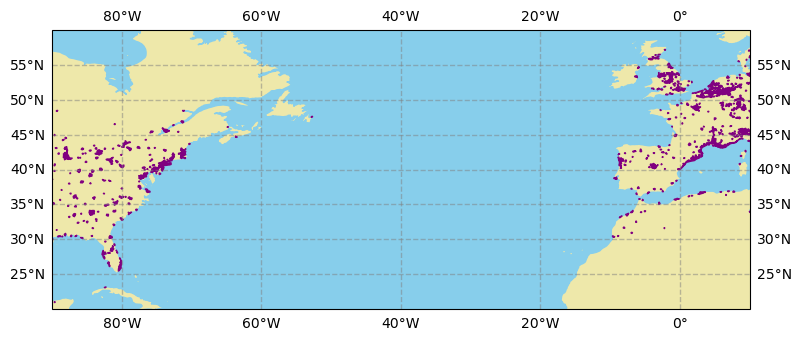

In [29]:
urban = cfeature.NaturalEarthFeature(
    category = "cultural", name = "urban_areas", scale='50m'
)

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

# format: [min_lon, max_lon, min_lat, max_lat]
ax.set_extent([-90, 10, 20, 60], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, color="palegoldenrod")
ax.add_feature(cfeature.OCEAN, color="skyblue")
ax.add_feature(urban, color="purple")

ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1, color='gray', alpha=0.5, linestyle='--'
)

plt.show(fig)